# Decision Tree Classification 

# 1) Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


In [2]:
# Load the Excel file
xls = pd.ExcelFile(r"C:\Users\sahil\Desktop\excelr data science\Assignments\Decision Tree\heart_disease.xlsx")

# Print all sheet names
print(xls.sheet_names)

['Description', 'Heart_disease']


In [3]:
df = pd.read_excel(r"C:\Users\sahil\Desktop\excelr data science\Assignments\Decision Tree\heart_disease.xlsx", sheet_name ="Heart_disease")


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [5]:
df.shape

(908, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [8]:
# Here we can see oldpeak have 62 null values so lets fill those with its mean

# Calculate the mode of the 'oldpeak' column
mode_oldpeak = df['oldpeak'].mode()[0]

In [9]:
# Fill missing values in the 'oldpeak' column with the mode
df['oldpeak'].fillna(mode_oldpeak, inplace=True)


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [11]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.830396,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.079518,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.200000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [12]:
# Dealing with outliers

# 1) age

upper_limit = df['age'].mean() + 3*df['age'].std()
lower_limit = df['age'].mean() - 3*df['age'].std()

print(upper_limit,lower_limit)

81.26594220028116 26.31775824024748


In [13]:
df.loc[(df['age']>upper_limit)|(df['age']<lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


In [14]:
# 2) trestbps

upper_limit = df['trestbps'].mean() + 3*df['trestbps'].std()
lower_limit = df['trestbps'].mean() - 3*df['trestbps'].std()

print(upper_limit,lower_limit)


194.63544086205698 72.22579261811924


In [15]:
df.loc[(df['trestbps']>upper_limit)|(df['trestbps']<lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
396,55,Male,non-anginal,196,406,False,st-t abnormality,72,TURE,0.0,downsloping,fixed defect,0
589,54,Male,asymptomatic,200,198,False,normal,142,True,2.0,flat,normal,1
789,64,Female,asymptomatic,200,0,False,normal,140,True,1.0,flat,normal,3
791,61,Male,non-anginal,200,0,False,st-t abnormality,70,False,0.0,downsloping,normal,3
795,56,Female,asymptomatic,200,288,True,lv hypertrophy,133,True,4.0,downsloping,reversable defect,3
842,55,Male,non-anginal,0,0,False,normal,155,False,1.5,flat,reversable defect,3
873,74,Male,typical angina,196,216,True,normal,120,FALSE,0.0,upsloping,reversable defect,3


In [16]:
df.loc[(df['trestbps']>upper_limit), 'trestbps'] = upper_limit
df.loc[(df['trestbps']<lower_limit), 'trestbps'] = lower_limit

In [17]:
# 3) chol

upper_limit = df['chol'].mean() + 3*df['chol'].std()
lower_limit = df['chol'].mean() - 3*df['chol'].std()

print(upper_limit,lower_limit)


537.7784282019215 -134.80926520632687


In [18]:
df.loc[(df['chol']>upper_limit)|(df['chol']<lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
157,67,Female,non-anginal,115.0,564,False,lv hypertrophy,160,False,1.6,flat,reversable defect,0
570,54,Male,asymptomatic,130.0,603,True,normal,125,True,1.0,flat,fixed defect,1


In [19]:
df.loc[(df['chol']>upper_limit), 'chol'] = upper_limit
df.loc[(df['chol']<lower_limit), 'chol'] = lower_limit

In [20]:
# 4) thalch


upper_limit = df['thalch'].mean() + 3*df['thalch'].std()
lower_limit = df['thalch'].mean() - 3*df['thalch'].std()

print(upper_limit,lower_limit)



216.3718353676679 55.54226154863167


In [21]:
df.loc[(df['thalch']>upper_limit)|(df['thalch']<lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


In [22]:
# 5) oldpeak


upper_limit = df['oldpeak'].mean() + 3*df['oldpeak'].std()
lower_limit = df['oldpeak'].mean() - 3*df['oldpeak'].std()

print(upper_limit,lower_limit)


4.068951000308028 -2.408158048766177


In [23]:
df.loc[(df['oldpeak']>upper_limit)|(df['oldpeak']<lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
149,59,Male,typical angina,178.0,270.0,False,lv hypertrophy,145,False,4.2,downsloping,reversable defect,0
525,46,Male,asymptomatic,100.0,0.0,False,st-t abnormality,133,False,-2.6,flat,normal,1
587,50,Male,asymptomatic,140.0,231.0,False,st-t abnormality,140,True,5.0,flat,fixed defect,1
792,62,Female,asymptomatic,160.0,164.0,False,lv hypertrophy,145,False,6.2,downsloping,reversable defect,3
794,55,Male,asymptomatic,140.0,217.0,False,normal,111,True,5.6,downsloping,reversable defect,3
814,51,Male,asymptomatic,140.0,298.0,False,normal,122,True,4.2,flat,reversable defect,3
880,58,Male,asymptomatic,114.0,318.0,False,st-t abnormality,140,False,4.4,downsloping,fixed defect,4


In [24]:
df.loc[(df['oldpeak']>upper_limit), 'oldpeak'] = upper_limit
df.loc[(df['oldpeak']<lower_limit), 'oldpeak'] = lower_limit

In [25]:
# 6) num

upper_limit = df['num'].mean() + 3*df['num'].std()
lower_limit = df['num'].mean() - 3*df['num'].std()

print(upper_limit,lower_limit)



4.442120013181304 -2.424498867806854


In [26]:
df.loc[(df['num']>upper_limit)|(df['num']<lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


In [27]:
# Data Visualizationm



array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'num'}>]], dtype=object)

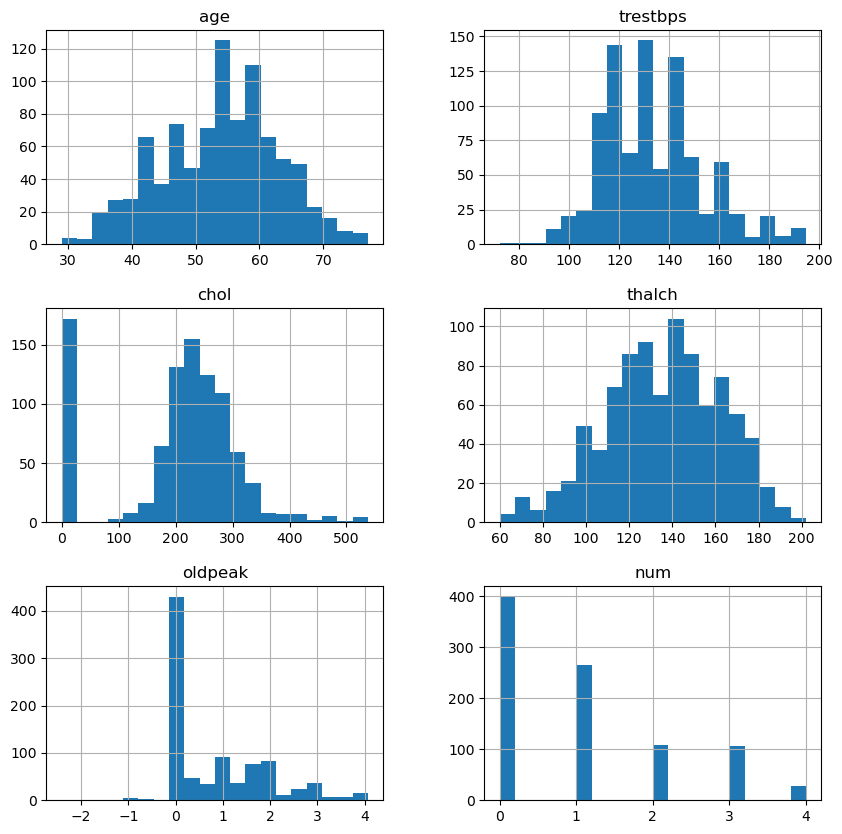

In [28]:
# Plotting histogramn to check data distribution

df.hist(bins=20, figsize=(10, 10))


<Axes: >

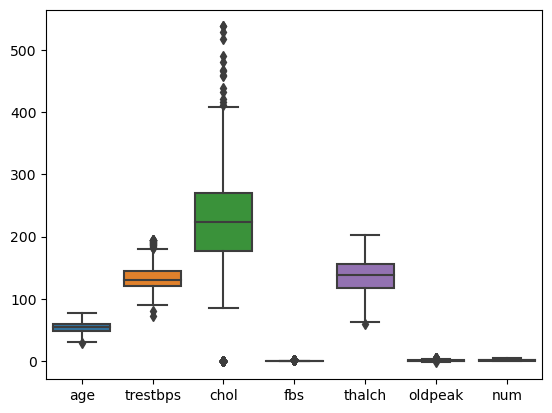

In [29]:
# Plotting boxplot to see outliers

sns.boxplot(data=df)

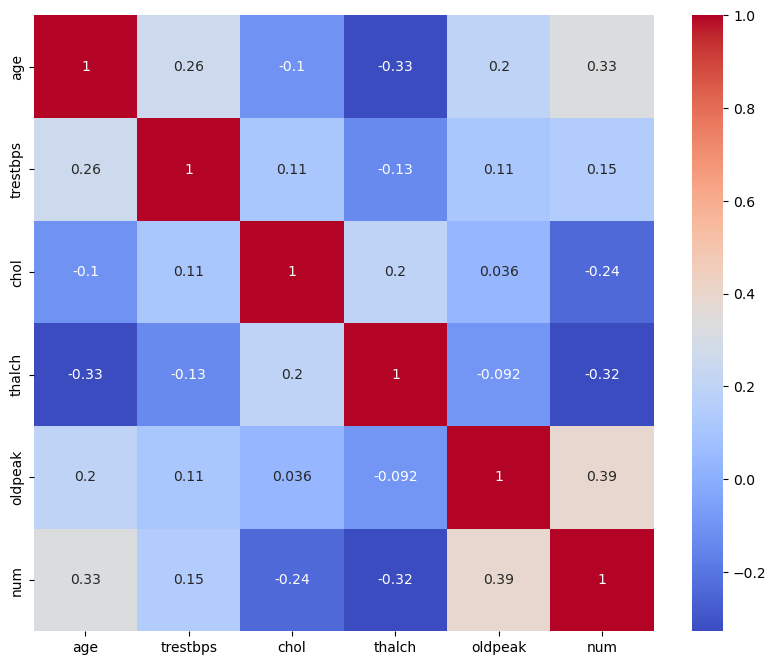

In [30]:
# Plotting correlation matrix


numeric_df = df.select_dtypes(include=['number'])


plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# 2) Feature Engineering:

In [31]:
# Dealing with catogerical columns

df = pd.get_dummies(df, drop_first=True)


In [32]:
df.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145.0,233.0,True,150,2.3,0,True,False,False,True,False,False,False,False,False,False,False,False,False
1,41,135.0,203.0,False,132,0.0,0,True,True,False,False,True,False,False,False,False,True,False,False,False
2,57,140.0,192.0,False,148,0.4,0,True,False,False,False,True,False,False,False,False,True,False,False,False
3,52,118.0,186.0,False,190,0.0,0,True,False,False,True,False,False,False,False,False,True,False,False,False
4,57,110.0,201.0,False,126,1.5,0,True,False,False,False,True,False,True,False,False,True,False,False,False


In [33]:
#  Standardization
scaler_standard = StandardScaler()
df_standardized = scaler_standard.fit_transform(df)  # Scaled Data (numpy array)

# Convert back to DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)

In [34]:
df_standardized.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.006027,0.578075,0.283022,1.976894,0.524183,1.395747,-0.881977,0.514416,-0.471246,-0.536603,4.379244,-1.216912,-0.495522,-0.768240,-0.146193,-0.203186,-0.997800,-0.698945,-0.859921,-0.784639
1,-1.397560,0.076120,0.014467,-0.505844,-0.147705,-0.780519,-0.881977,0.514416,2.122034,-0.536603,-0.228350,0.821752,-0.495522,-0.768240,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,-0.784639
2,0.350503,0.327098,-0.084003,-0.505844,0.449529,-0.402038,-0.881977,0.514416,-0.471246,-0.536603,-0.228350,0.821752,-0.495522,-0.768240,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,-0.784639
3,-0.195767,-0.777203,-0.137714,-0.505844,2.017268,-0.780519,-0.881977,0.514416,-0.471246,-0.536603,4.379244,-1.216912,-0.495522,-0.768240,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,-0.784639
4,0.350503,-1.178766,-0.003436,-0.505844,-0.371668,0.638785,-0.881977,0.514416,-0.471246,-0.536603,-0.228350,0.821752,-0.495522,1.301677,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,-0.784639


# 3) Decision Tree Classification:

In [35]:
X = df.drop('num', axis=1)
y = df['num']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [37]:
# Implement Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [38]:
# Evaluate the model
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        76
           1       0.43      0.42      0.43        55
           2       0.28      0.41      0.33        22
           3       0.25      0.13      0.17        23
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.33      0.34      0.33       182
weighted avg       0.49      0.51      0.50       182

Accuracy: 0.510989010989011


In [39]:

# Predict probabilities for all classes
y_prob = dt_model.predict_proba(X_test)  # This will get the probabilities for all classes

# Check if it's multi-class
if len(set(y_test)) > 2:  
    # Using the full probability matrix for multi-class ROC AUC
    print('ROC-AUC:', roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro'))
else:
    # For binary classification, you can still select the second column for the positive class
    print('ROC-AUC:', roc_auc_score(y_test, y_prob[:, 1]))


ROC-AUC: 0.6037078465625003


# 4) Hyperparameter Tuning:

In [40]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}


# 5) Model Evaluation and Analysis:

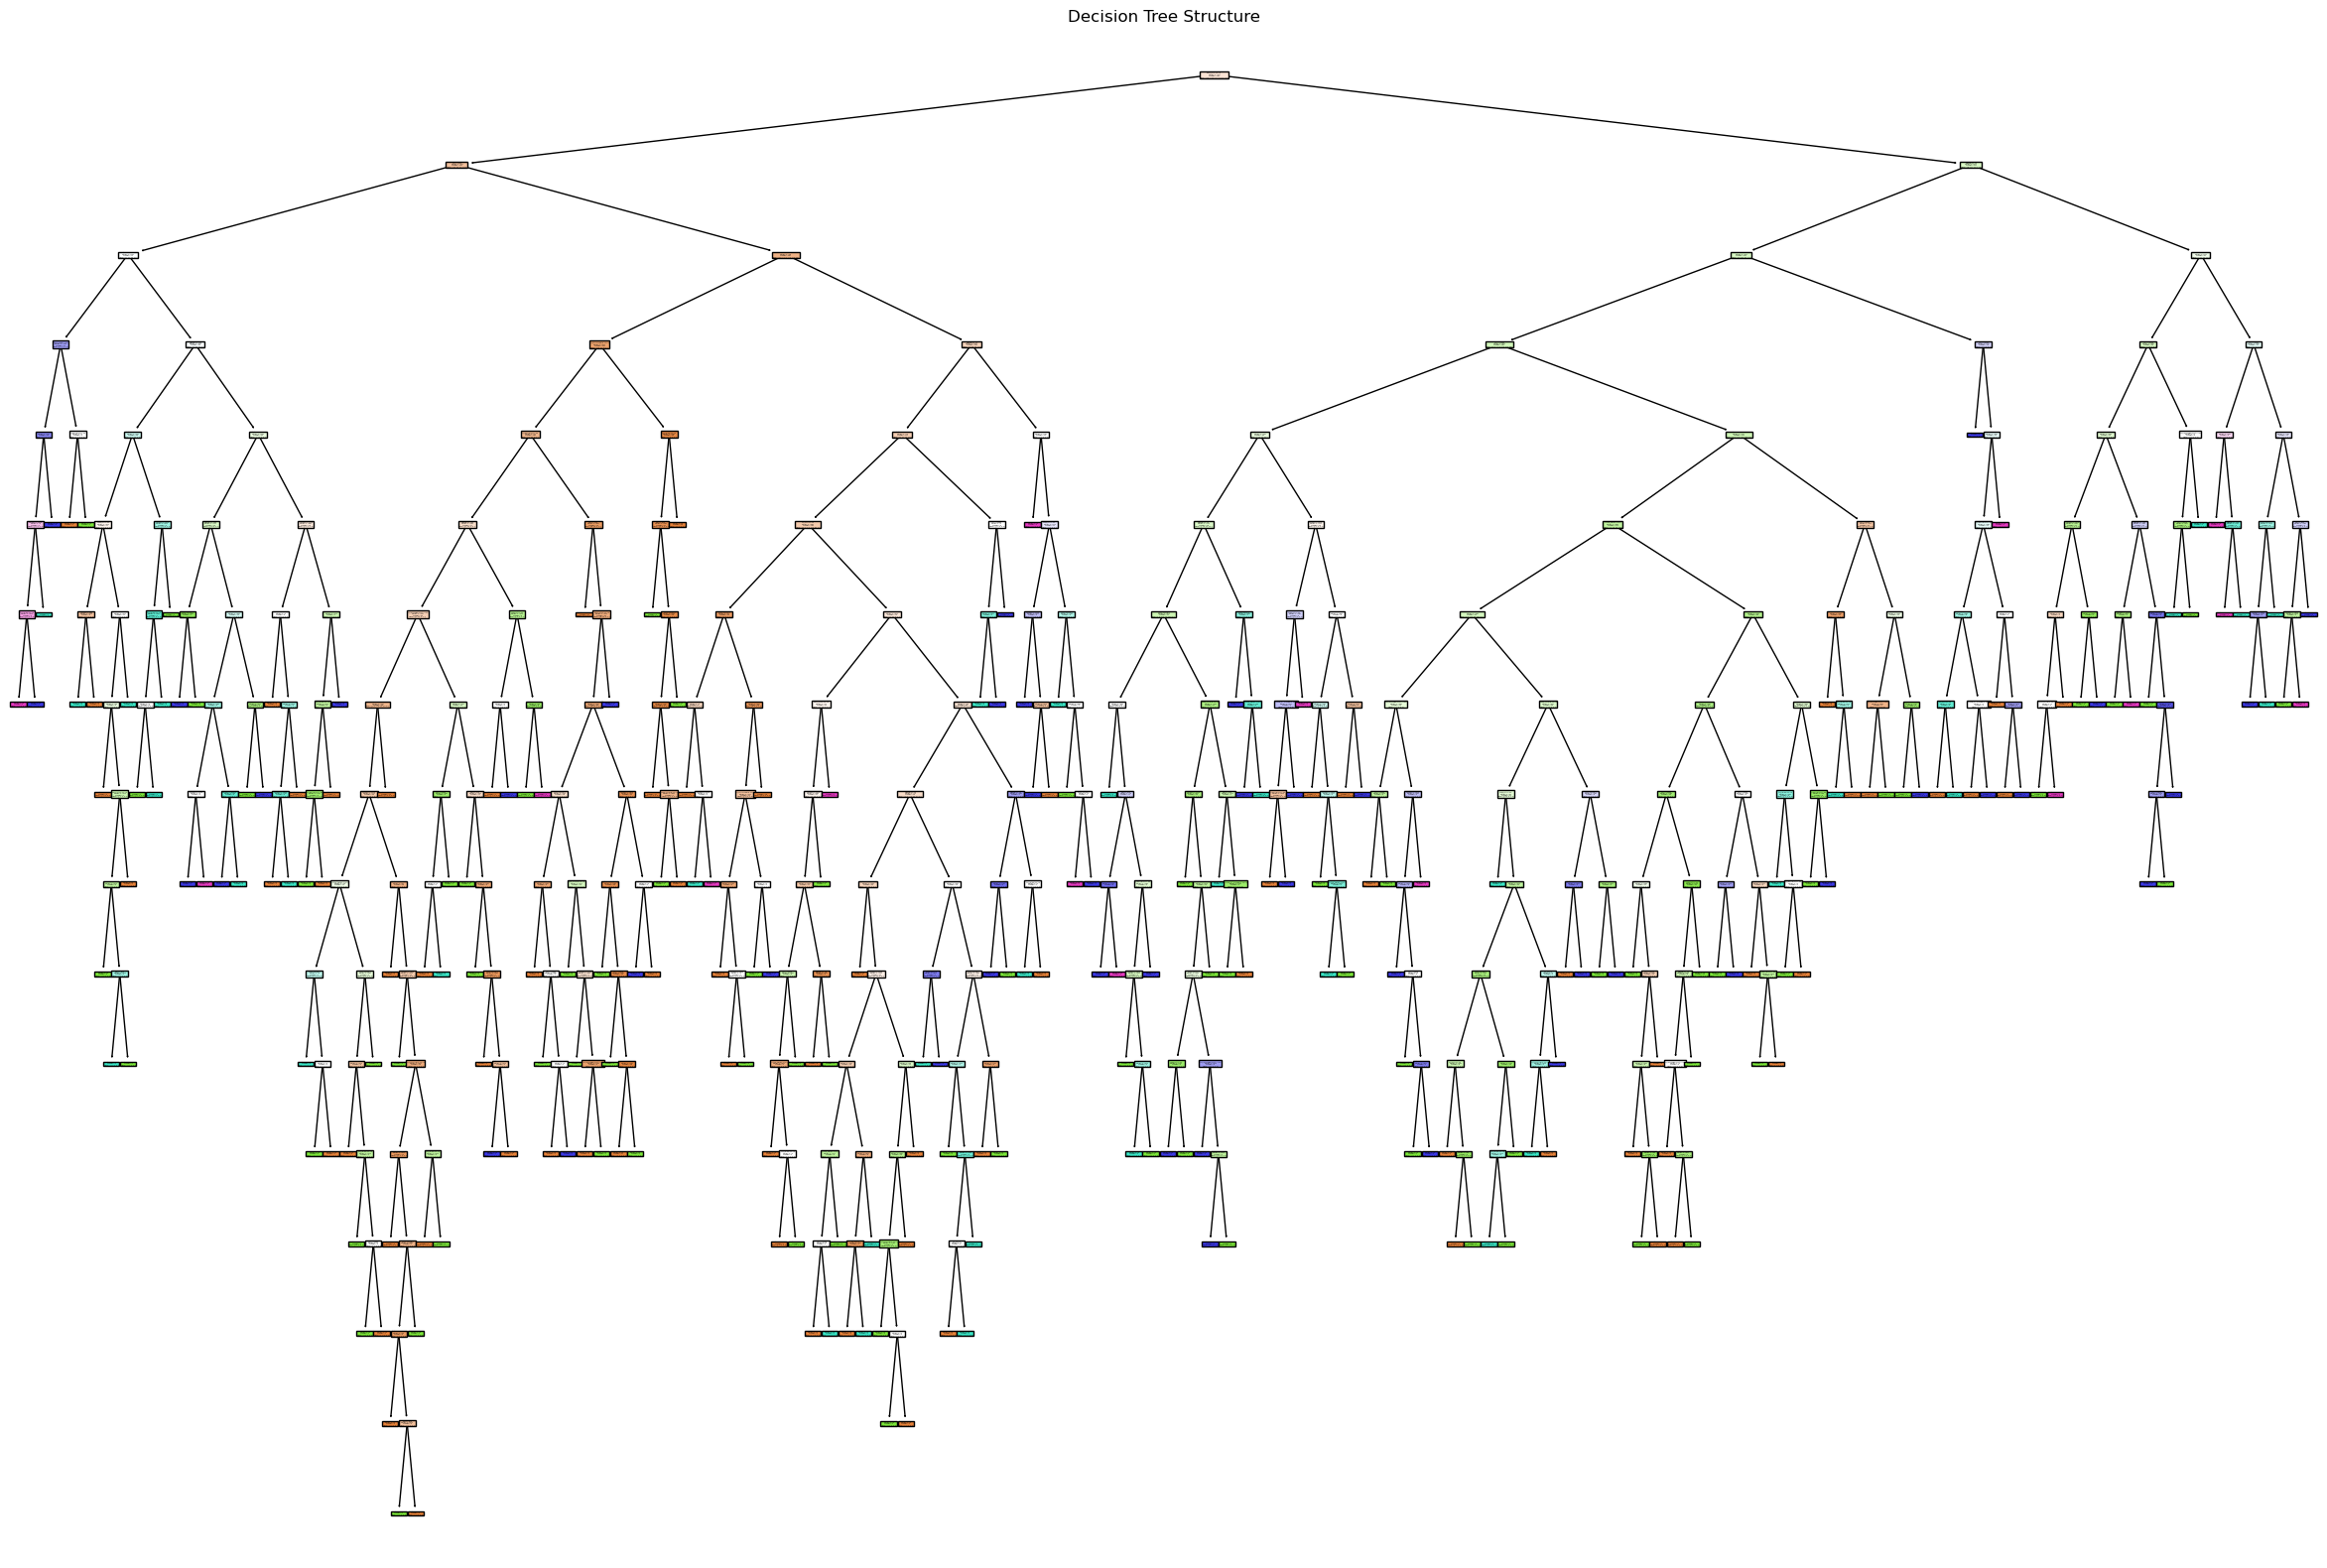

In [41]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 20))
plot_tree(dt_model, filled=True, feature_names=X.columns)
plt.title("Decision Tree Structure")
plt.show()
